# Random Forest Exercises Notebook

## Introdução
 Este notebook apresenta uma série de exercícios para entender e aplicar o modelo de Floresta Aleatória. 
 Vamos explorar como funciona o modelo, treinar e avaliar modelos em um conjunto de dados e ajustar seus 
 parâmetros para melhorar o desempenho.

### Objetivos:
 - Entender a teoria básica por trás da Floresta Aleatória.
 - Treinar e avaliar uma Floresta Aleatória em um conjunto de dados.
 - Ajustar hiperparâmetros para otimizar o desempenho do modelo.


In [1]:
# Importando Bibliotecas Necessárias
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.datasets import load_iris, fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns

#  1. Classificação com Floresta Aleatória
Neste exercício, usaremos o conjunto de dados Iris para construir e avaliar um modelo de classificação com Floresta Aleatória.
Carregue o conjunto de dados Iris e divida-o em treino e teste

In [2]:
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Treine uma Floresta Aleatória com 100 árvores e avalie a acurácia no conjunto de teste

In [3]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia no conjunto de teste: {accuracy:.2f}')


Acurácia no conjunto de teste: 1.00


 ### Exercício 1:
 Altere o número de árvores na floresta para 50, 200, e 500 e observe como a acurácia muda.
 Qual o número ideal de árvores para este conjunto de dados?


#### Possível resposta:

In [4]:
n_estimators_list = [50, 100, 200, 500]
for n in n_estimators_list:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Acurácia com {n} árvores: {accuracy:.2f}')

Acurácia com 50 árvores: 1.00
Acurácia com 100 árvores: 1.00
Acurácia com 200 árvores: 1.00
Acurácia com 500 árvores: 1.00


### Exercício 2:
 Avalie a importância das features no modelo treinado. Quais são as features mais importantes?


#### Possível resposta:

In [5]:
feature_importances = clf.feature_importances_
for i, feature in enumerate(data.feature_names):
    print(f'{feature}: {feature_importances[i]:.2f}')

sepal length (cm): 0.12
sepal width (cm): 0.04
petal length (cm): 0.43
petal width (cm): 0.41


 ## 2. Regressão com Floresta Aleatória
 Vamos agora usar uma Floresta Aleatória para resolver um problema de regressão, utilizando o conjunto de dados Boston.


In [6]:
# Carregue o conjunto de dados da Califórnia e divida-o em treino e teste
data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
# Treine uma Floresta Aleatória para regressão com 100 árvores e calcule o erro quadrático médio
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Erro Quadrático Médio no conjunto de teste: {mse:.2f}')

Erro Quadrático Médio no conjunto de teste: 0.26


 ### Exercício 3:
 Altere o número de árvores para 50, 200, e 500 e observe como o erro quadrático médio muda.
 Qual é o número ideal de árvores para este conjunto de dados?


#### Possível resposta:

In [8]:
n_estimators_list = [50, 100, 200, 500]
for n in n_estimators_list:
    reg = RandomForestRegressor(n_estimators=n, random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Erro Quadrático Médio com {n} árvores: {mse:.2f}')

Erro Quadrático Médio com 50 árvores: 0.26
Erro Quadrático Médio com 100 árvores: 0.26
Erro Quadrático Médio com 200 árvores: 0.25
Erro Quadrático Médio com 500 árvores: 0.25


### Exercício 4:
Avalie a importância das features no modelo treinado. Quais são as features mais importantes?

#### Possível resposta:

In [9]:
feature_importances = reg.feature_importances_
for i, feature in enumerate(data.feature_names):
    print(f'{feature}: {feature_importances[i]:.2f}')

MedInc: 0.53
HouseAge: 0.05
AveRooms: 0.05
AveBedrms: 0.03
Population: 0.03
AveOccup: 0.14
Latitude: 0.09
Longitude: 0.09


 ## 3. Otimizando Hiperparâmetros com GridSearchCV
 Vamos utilizar uma pesquisa em grade para encontrar os melhores hiperparâmetros para a Floresta Aleatória.

In [10]:
from sklearn.model_selection import GridSearchCV

# Parâmetros para o RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}

# Usando RandomForestRegressor para o problema de regressão
regressor = RandomForestRegressor(random_state=42)

# Configurando o GridSearchCV para regressão
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Exibindo os melhores parâmetros e a menor média de erro quadrático
print(f'Melhores parâmetros encontrados: {grid_search.best_params_}')
print(f'Melhor erro quadrático médio negativo obtido: {grid_search.best_score_:.2f}')


Melhores parâmetros encontrados: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
Melhor erro quadrático médio negativo obtido: -0.26


 ### Exercício 5:
 Experimente ajustar a grade de hiperparâmetros, adicionando valores diferentes para `n_estimators` e `max_depth`.
 Como os novos parâmetros impactam o desempenho do modelo?

#### Possível resposta:

In [11]:
# Parâmetros para o RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2']
}

# Usando RandomForestRegressor para o problema de regressão
regressor = RandomForestRegressor(random_state=42)

# Configurando o GridSearchCV para regressão
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Exibindo os melhores parâmetros e o menor erro quadrático médio
print(f'Melhores parâmetros encontrados: {grid_search.best_params_}')
print(f'Melhor erro quadrático médio negativo obtido: {grid_search.best_score_:.2f}')

Melhores parâmetros encontrados: {'max_depth': 30, 'max_features': 'log2', 'n_estimators': 500}
Melhor erro quadrático médio negativo obtido: -0.26


 ## 4. Visualizando a Importância das Features
 Vamos agora visualizar a importância das features para o modelo de classificação.


### Exercício 6:
 Crie um gráfico de barras mostrando a importância das features no modelo de classificação.

#### Possível resposta:

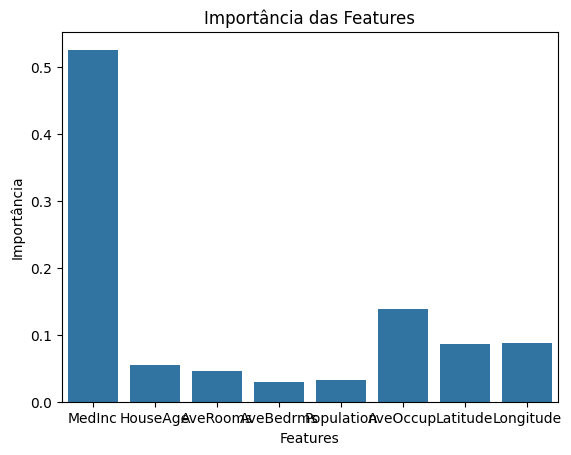

In [12]:
importances = reg.feature_importances_
sns.barplot(x=data.feature_names, y=importances)
plt.title('Importância das Features')
plt.xlabel('Features')
plt.ylabel('Importância')
plt.show()

 ### Conclusão
 Neste notebook, exploramos o uso de Florestas Aleatórias para classificação e regressão. 
 Também ajustamos hiperparâmetros e visualizamos a importância das features.
 Experimente modificar alguns parâmetros para ver como o modelo responde!